# Constrained clustering. COP-KMeans algorithm.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint, shuffle
from sys import exit

## Initial data

In [0]:
points = pd.DataFrame({
    'x': [3,4,5,6,7,
    4,5,6,7,
    5,6,7,
    6,7,
    7,
    1,
    1,2,
    1,2,3,
    1,2,3,4,
    1,2,3,4,5],
    'y': [1,1,1,1,1,
    2,2,2,2,
    3,3,3,
    4,4,
    5,
    2,
    3,3,
    4,4,4,
    5,5,5,5,
    6,6,6,6,6]
})

## Must and cannot links

In [0]:
M = [
    [[1,4], [1,6]],
    [[1,4], [3,6]],
    [[3,1], [5,3]],
    [[5,3], [7,5]]
]
C = [
    [[1,4], [3,1]],
    [[5,3], [1,6]],
    [[7,5], [3,6]]
]

## Must and cannot matrices

#### 1-s mean bounds between points

In [0]:
M_mat = np.zeros((len(points), len(points)), dtype=np.int8)
for pair in M:
    i1, i2 = -1, -1
    for row, col in points.iterrows():
        if col.x == pair[0][0] and col.y == pair[0][1]:
            indx0 = row
        if col.x == pair[1][0] and col.y == pair[1][1]:
            indx1 = row
        if i1 > -1 and i2 > -1:
            break
    M_mat[indx0, indx1] = 1
    M_mat[indx1, indx0] = 1

C_mat = np.zeros((len(points), len(points)), dtype=np.int8)
for pair in C:
    i1, i2 = -1, -1
    for row, col in points.iterrows():
        if col.x == pair[0][0] and col.y == pair[0][1]:
            indx0 = row
        if col.x == pair[1][0] and col.y == pair[1][1]:
            indx1 = row
        if i1 > -1 and i2 > -1:
            break
    C_mat[indx0, indx1] = 1
    C_mat[indx1, indx0] = 1

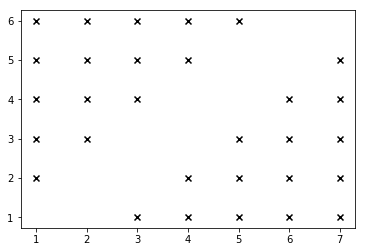

In [12]:
plt.scatter(points['x'], points['y'], c='k', marker='x');

### K-means

In [0]:
# MULTICLASS

k = 2
minval = 0
maxval = 7
c = {}
for i in range(k):
    c.update({i: [round(randint(minval, maxval),3) for i in range(2)]})
accuracy = 0.001
dist_sum = 0

_______________________

Center 0: [4, 2] 
Center 1: [4, 4]


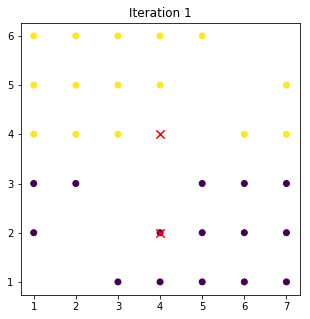

Distance sum =  32.6593
_______________________

Center 0: [4.6, 2.0] 
Center 1: [3.4, 5.0]


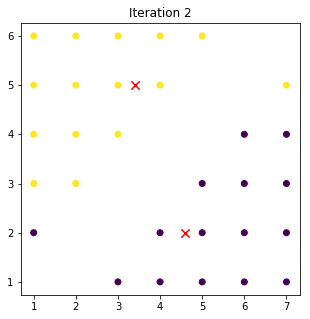

Distance sum =  27.8134
_______________________

Center 0: [5.267, 2.133] 
Center 1: [2.733, 4.867]


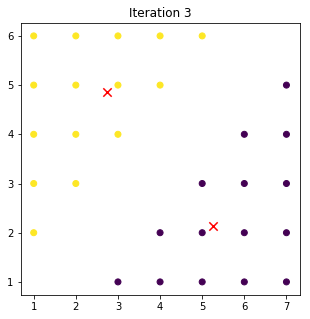

Distance sum =  24.7575
_______________________

Center 0: [5.667, 2.333] 
Center 1: [2.333, 4.667]


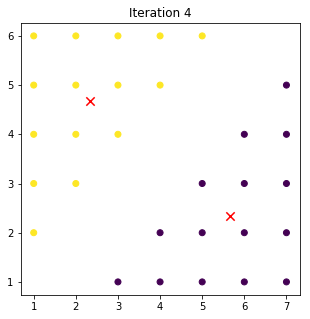

Distance sum =  24.1516
_______________________

Center 0: [5.667, 2.333] 
Center 1: [2.333, 4.667]


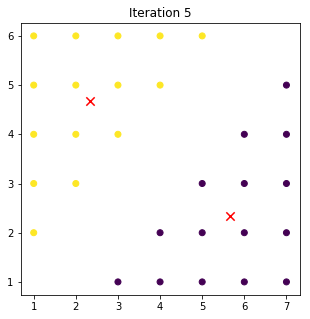

Distance sum =  24.1516


In [16]:
# TODO: extract dimensios from dataset

# converging
iteration = 1
while True:
    print('_______________________')
    print()
    print("Center 0:", list(map(lambda x: round(x, 3), c[0])), '\n'
          "Center 1:", list(map(lambda x: round(x, 3), c[1])))
    labels = []
    distances = []
    for row, col in points.iterrows():
        temp_label = -1
        dist = 1000000
        for center in c:
            if ((c.get(center)[0] - col.x)**2 + (c.get(center)[1] - col.y)**2)**0.5 < dist:
                temp_label = center
                dist = ((c.get(center)[0] - col.x)**2 + (c.get(center)[1] - col.y)**2)**0.5
                
        labels.append(temp_label)
        distances.append(dist)
    points['lbl'] = labels
    dist_sum_new = 0.5*sum(distances)

    plt.figure(figsize=(5,5))
    plt.scatter(points['x'], points['y'], c=points['lbl']);
    plt.scatter([c.get(i)[0] for i in c], [c.get(i)[1] for i in c], c='r', marker='x', s=70);
    plt.title("Iteration " + str(iteration))
    plt.pause(0.05);
    
    if abs(dist_sum - dist_sum_new)  < accuracy:
        print("Distance sum = ", round(dist_sum_new,len(str(accuracy).split('.')[1])+1))
        break
    else:
        for i in range(k):
            c[i] = [sum(points.x[points.lbl == i])/len(points.x[points.lbl == i]),
              sum(points.y[points.lbl == i])/len(points.y[points.lbl == i])]
        iteration+=1
        dist_sum = dist_sum_new
        print("Distance sum = ", round(dist_sum_new,len(str(accuracy).split('.')[1])+1))

### COP K-means

#### M and C matrices as DataFrames

In [0]:
M_mat_df = pd.DataFrame(M_mat)
C_mat_df = pd.DataFrame(C_mat)

### Rise exit during converging

In [0]:
def rise_my_exc():
    print('ERRRROR!!')
    print('Point ', points[['x','y']].iloc[i])
    print('Must')
    print(points[['x','y']].iloc[M_indx])
    print('Labels')
    print(M_labels)
    print('Cannot:')
    print(points[['x','y']].iloc[C_indx])
    print('Labels')
    print(C_labels)
    exit()

### Parameters COP-KMeans

#### points_list shuffled

In [0]:
k = 2
c0 = [1,5]
c1 = [1,3.5]

dist_sum = 0
iteration = 1

points_list = list(range(len(points.x)))
# shuffle(points_list)
# points_list = [19, 0, 1, 2, 11, 17, 3, 27, 6, 23, 13, 20, 22, 8, 10, 29, 18, 4, 25, 9, 7, 21, 26, 14, 24, 28, 16, 12, 15, 5]
points_list = [17, 23, 10, 6, 24, 21, 0, 5, 13, 2, 19, 29, 22, 11, 26, 15, 25, 16, 4, 3, 18, 27, 7, 8, 9, 1, 20, 28, 12, 14]
# print(points_list)

Check constraints
Must
[[1, 4], [1, 6]]
[[1, 4], [3, 6]]
[[3, 1], [5, 3]]
[[5, 3], [7, 5]]
Cannot
[[1, 4], [3, 1]]
[[5, 3], [1, 6]]
[[7, 5], [3, 6]]
_______________________

Center 0: [1, 5] 
Center 1: [1, 3.5]


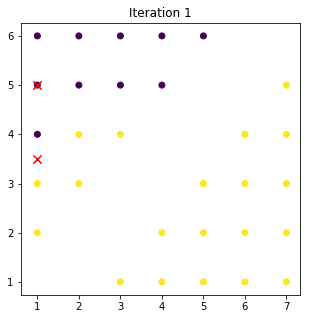

Distance sum =  225.0
_______________________

Center 0: [2.6, 5.4] 
Center 1: [4.7, 2.55]


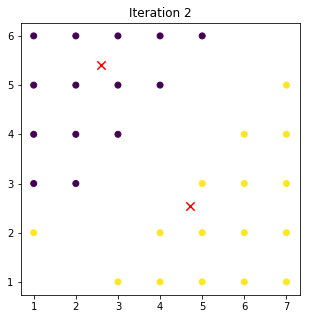

Distance sum =  58.53
_______________________

Center 0: [2.429, 4.857] 
Center 1: [5.375, 2.312]


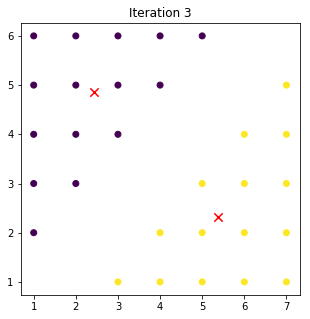

Distance sum =  47.648
_______________________

Center 0: [2.333, 4.667] 
Center 1: [5.667, 2.333]


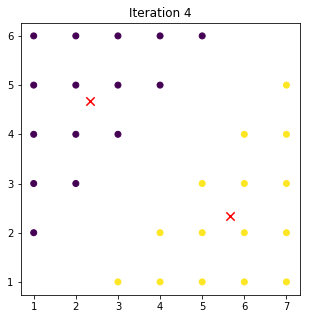

Distance sum =  46.667
_______________________

Center 0: [2.333, 4.667] 
Center 1: [5.667, 2.333]


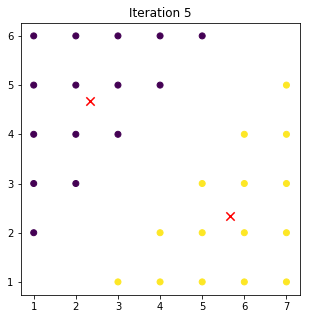

46.667
Converge!


In [18]:
# converging

print('Check constraints')
print('Must')
for pair in M:
    print(pair)
print('Cannot')
for pair in C:
    print(pair)
while True:
    print('_______________________')
    print()
    print("Center 0:", list(map(lambda x: round(x, 3), c0)), '\n'
          "Center 1:", list(map(lambda x: round(x, 3), c1)))
    
    points['dist0'] = list(map(lambda x,y: ((c0[0]-x)**2 + (c0[1]-y)**2)**0.5, points.x, points.y))
    points['dist1'] = list(map(lambda x,y: ((c1[0]-x)**2 + (c1[1]-y)**2)**0.5, points.x, points.y))
    
    labels = {}
    points_seen = []

    for i in points_list: # loop for all points
        M_indx = [] # must points
        C_indx = [] # cannot points

        if (sum(M_mat_df[i].iloc[points_seen]) == 0) & (sum(C_mat_df[i].iloc[points_seen]) == 0) or (len(points_seen) == 0): #for first and unconstrained points
            lbl_temp = 0 if points.iloc[i].dist0 < points.iloc[i].dist1 else 1
        elif (sum(M_mat_df[i].iloc[points_seen]) > 0) & (sum(C_mat_df[i].iloc[points_seen]) > 0): # the point has both constraints
            M_indx = list(M_mat_df[i].iloc[points_seen][M_mat_df[i].iloc[points_seen] > 0].keys())
            M_labels = [labels.get(indx) for indx in M_indx]
            C_indx = list(C_mat_df[i].iloc[points_seen][C_mat_df[i].iloc[points_seen] > 0].keys())
            C_labels = [labels.get(indx) for indx in C_indx]

            if sum([m==c for m in M_labels for c in C_labels]) > 0:
                rise_my_exc()
            lbl_temp = M_labels[0]
        elif sum(M_mat_df[i].iloc[points_seen]) > 0: # must constraint only
            M_indx = list(M_mat_df[i].iloc[points_seen][M_mat_df[i].iloc[points_seen] > 0].keys())
            sum_lbl = [labels.get(indx) for indx in M_indx] # do points seen have different labels?
            for lbl in sum_lbl:
                if sum_lbl[0] != lbl:
                    rise_my_exc()
            lbl_temp = sum_lbl[0]
        else: # cannot constraint only
            C_indx = list(C_mat_df[i].iloc[points_seen][C_mat_df[i].iloc[points_seen] > 0].keys())
            sum_lbl = [labels.get(indx) for indx in C_indx] # do points seen have different labels?
            for lbl in sum_lbl:
                if sum_lbl[0] != lbl:
                    rise_my_exc()
            lbl_temp = 1 if sum_lbl[0] == 0 else 0
        
        # marking and remembering the point
        labels[i] = lbl_temp
        points_seen.append(i)
    
    # sorting labels
    new_lbls = []
    for p in range(len(labels)):
        new_lbls.append(labels.get(p))
    points['lbl'] = new_lbls
    
    # objective function
    dist_sum_new = 0.5 * sum([col.dist0**2 if col.dist0 < col.dist1 else col.dist1**2 for row, col in points.iterrows()])
    
    #plotting current clustering
    plt.figure(figsize=(5,5))
    plt.scatter(points['x'], points['y'], c=list(points['lbl']));
    plt.scatter([c0[0], c1[0]], [c0[1], c1[1]], c='r', marker='x', s=70);
    plt.title("Iteration " + str(iteration))
    plt.pause(0.05);
    
    if abs(dist_sum - dist_sum_new)  < 0.01:
        print(round(dist_sum_new,3))
        print('Converge!')
        break
    else:
        c0 = [sum(points.x[points.lbl == 0])/len(points.x[points.lbl == 0]),
              sum(points.y[points.lbl == 0])/len(points.y[points.lbl == 0])]
        c1 = [sum(points.x[points.lbl == 1])/len(points.x[points.lbl == 1]),
              sum(points.y[points.lbl == 1])/len(points.y[points.lbl == 1])]
        iteration+=1
        dist_sum = dist_sum_new
        print("Distance sum = ", round(dist_sum_new,3))
plt.show()

### Points in order occured

In [19]:
print(points_seen)

[17, 23, 10, 6, 24, 21, 0, 5, 13, 2, 19, 29, 22, 11, 26, 15, 25, 16, 4, 3, 18, 27, 7, 8, 9, 1, 20, 28, 12, 14]
